In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
#import vaex


In [2]:
df_train= pd.read_csv('train.csv')
df_train.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [3]:
#df_test= pd.read_csv('test.csv')
#df_test.head()

In [4]:
df_new= df_train.drop(['UNIQUEID','BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','STATE_ID', 'EMPLOYEE_CODE_ID'], axis=1)
df_new.head()


#Dropped above variable as these are ID fields and will not play significant role in the model build/target prediction.

,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,50578,58400,89.55,01-01-1984,Salaried,03-08-2018,1,1,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,47145,65550,73.23,31-07-1985,Self employed,26-09-2018,1,1,0,0,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,53278,61360,89.63,24-08-1985,Self employed,01-08-2018,1,1,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,57513,66113,88.48,30-12-1993,Self employed,26-10-2018,1,1,0,0,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,09-12-1977,Self employed,26-09-2018,1,1,0,0,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [5]:
df_new.shape

(233154, 34)

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   DISBURSED_AMOUNT                     233154 non-null  int64  
 1   ASSET_COST                           233154 non-null  int64  
 2   LTV                                  233154 non-null  float64
 3   DATE_OF_BIRTH                        233154 non-null  object 
 4   EMPLOYMENT_TYPE                      225493 non-null  object 
 5   DISBURSAL_DATE                       233154 non-null  object 
 6   MOBILENO_AVL_FLAG                    233154 non-null  int64  
 7   AADHAR_FLAG                          233154 non-null  int64  
 8   PAN_FLAG                             233154 non-null  int64  
 9   VOTERID_FLAG                         233154 non-null  int64  
 10  DRIVING_FLAG                         233154 non-null  int64  
 11  PASSPORT_FLAG

In [7]:
df_new.describe()

,DISBURSED_AMOUNT,ASSET_COST,LTV,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,...,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,233154.000000,2.331540e+05,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,54356.993528,7.586507e+04,74.746530,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,12971.314171,1.894478e+04,11.456636,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,13320.000000,3.700000e+04,10.030000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,47145.000000,6.571700e+04,68.880000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,53803.000000,7.094600e+04,76.800000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,60413.000000,7.920175e+04,83.670000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,990572.000000,1.628992e+06,95.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [8]:
df_new.isnull().sum()

#only employment_type has null values.

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
PRI_DISBURSED_AMOUNT                      0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS               

In [9]:
df_new.isnull().sum()*100/df_new.shape[0]

#employment_type has 3.2% null value out of the total records

DISBURSED_AMOUNT                       0.000000
ASSET_COST                             0.000000
LTV                                    0.000000
DATE_OF_BIRTH                          0.000000
EMPLOYMENT_TYPE                        3.285811
DISBURSAL_DATE                         0.000000
MOBILENO_AVL_FLAG                      0.000000
AADHAR_FLAG                            0.000000
PAN_FLAG                               0.000000
VOTERID_FLAG                           0.000000
DRIVING_FLAG                           0.000000
PASSPORT_FLAG                          0.000000
PERFORM_CNS_SCORE                      0.000000
PERFORM_CNS_SCORE_DESCRIPTION          0.000000
PRI_NO_OF_ACCTS                        0.000000
PRI_ACTIVE_ACCTS                       0.000000
PRI_OVERDUE_ACCTS                      0.000000
PRI_CURRENT_BALANCE                    0.000000
PRI_SANCTIONED_AMOUNT                  0.000000
PRI_DISBURSED_AMOUNT                   0.000000
SEC_NO_OF_ACCTS                        0

In [10]:
#df_new['EMPLOYMENT_TYPE']=df_new['EMPLOYMENT_TYPE'].fillna(value='No_info')
#df_new.head()
#df_new['EMPLOYMENT_TYPE'].value_counts()

#Taking two cases here:
#1. Dropping the nulls
#2. Imputing the nulls

In [11]:
print(df_new[df_new['EMPLOYMENT_TYPE'].isnull()]['LOAN_DEFAULT'].value_counts())
print(df_new['LOAN_DEFAULT'].value_counts())

0    6017
1    1644
Name: LOAN_DEFAULT, dtype: int64
0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64


In [12]:
df_new= df_new.dropna()
df_new=df_new.reset_index(drop=True)

In [13]:
df_new.index

RangeIndex(start=0, stop=225493, step=1)

In [14]:
df_new.dtypes

DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACCTS                          int64
PRI_ACTIVE_ACCTS                         int64
PRI_OVERDUE_ACCTS                        int64
PRI_CURRENT_BALANCE                      int64
PRI_SANCTIONED_AMOUNT                    int64
PRI_DISBURSED_AMOUNT                     int64
SEC_NO_OF_ACCTS                          int64
SEC_ACTIVE_AC

In [15]:
df_new['PERFORM_CNS_SCORE_DESCRIPTION'].nunique()

20

In [16]:
df_new["DATE_OF_BIRTH"] = df_new["DATE_OF_BIRTH"].astype('datetime64')

In [17]:
df_new["DISBURSAL_DATE"] = df_new["DISBURSAL_DATE"].astype('datetime64')

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225493 entries, 0 to 225492
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   DISBURSED_AMOUNT                     225493 non-null  int64         
 1   ASSET_COST                           225493 non-null  int64         
 2   LTV                                  225493 non-null  float64       
 3   DATE_OF_BIRTH                        225493 non-null  datetime64[ns]
 4   EMPLOYMENT_TYPE                      225493 non-null  object        
 5   DISBURSAL_DATE                       225493 non-null  datetime64[ns]
 6   MOBILENO_AVL_FLAG                    225493 non-null  int64         
 7   AADHAR_FLAG                          225493 non-null  int64         
 8   PAN_FLAG                             225493 non-null  int64         
 9   VOTERID_FLAG                         225493 non-null  int64         
 

In [19]:
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
df_new.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,50578,58400,89.55,1984-01-01,Salaried,2018-03-08,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,47145,65550,73.23,1985-07-31,Self employed,2018-09-26,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,53278,61360,89.63,1985-08-24,Self employed,2018-01-08,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,57513,66113,88.48,1993-12-30,Self employed,2018-10-26,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,1977-09-12,Self employed,2018-09-26,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [20]:
#changing dtypes of cat columns
cols=['MOBILENO_AVL_FLAG',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'NO_OF_INQUIRIES', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NEW_ACCTS_IN_LAST_SIX_MONTHS']

In [21]:
for i in cols:
    print(i)
    print(df_new[i].value_counts())
    print('\n')

MOBILENO_AVL_FLAG
1    225493
Name: MOBILENO_AVL_FLAG, dtype: int64


AADHAR_FLAG
1    188900
0     36593
Name: AADHAR_FLAG, dtype: int64


PAN_FLAG
0    208043
1     17450
Name: PAN_FLAG, dtype: int64


VOTERID_FLAG
0    192317
1     33176
Name: VOTERID_FLAG, dtype: int64


DRIVING_FLAG
0    220152
1      5341
Name: DRIVING_FLAG, dtype: int64


PASSPORT_FLAG
0    225011
1       482
Name: PASSPORT_FLAG, dtype: int64


NO_OF_INQUIRIES
0     194990
1      21794
2       5294
3       1724
4        745
5        331
6        234
7        133
8        103
9         41
10        33
11        15
12        14
14         8
15         7
19         6
13         5
17         4
18         4
16         3
28         1
20         1
22         1
23         1
36         1
Name: NO_OF_INQUIRIES, dtype: int64


DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS
0     207647
1      14680
2       2405
3        519
4        136
5         56
6         20
7         12
8          7
12         3
11         3
10         2
9      

In [22]:
for col in cols:
    df_new[col]= df_new[col].astype('object')

In [23]:
df_new[['MOBILENO_AVL_FLAG',
       'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'NO_OF_INQUIRIES', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS']].dtypes

MOBILENO_AVL_FLAG                      object
AADHAR_FLAG                            object
PAN_FLAG                               object
VOTERID_FLAG                           object
DRIVING_FLAG                           object
PASSPORT_FLAG                          object
NO_OF_INQUIRIES                        object
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    object
dtype: object

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225493 entries, 0 to 225492
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   DISBURSED_AMOUNT                     225493 non-null  int64         
 1   ASSET_COST                           225493 non-null  int64         
 2   LTV                                  225493 non-null  float64       
 3   DATE_OF_BIRTH                        225493 non-null  datetime64[ns]
 4   EMPLOYMENT_TYPE                      225493 non-null  object        
 5   DISBURSAL_DATE                       225493 non-null  datetime64[ns]
 6   MOBILENO_AVL_FLAG                    225493 non-null  object        
 7   AADHAR_FLAG                          225493 non-null  object        
 8   PAN_FLAG                             225493 non-null  object        
 9   VOTERID_FLAG                         225493 non-null  object        
 

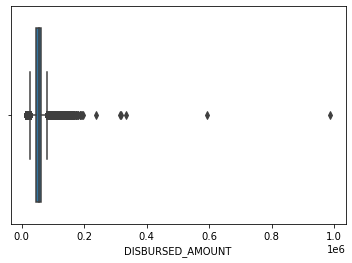

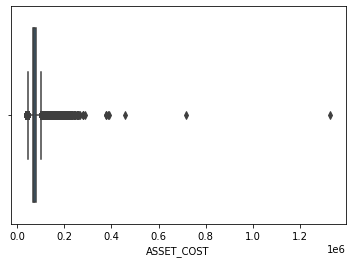

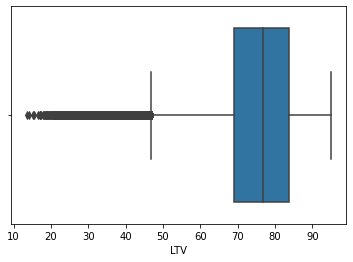

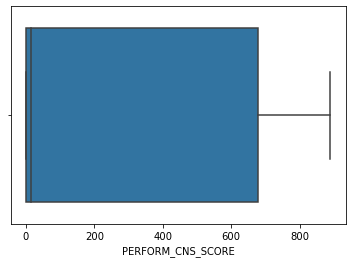

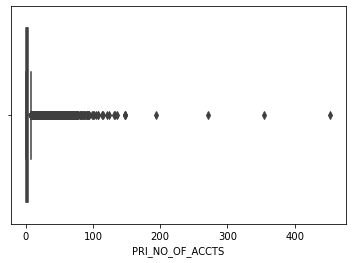

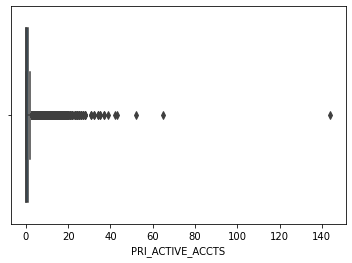

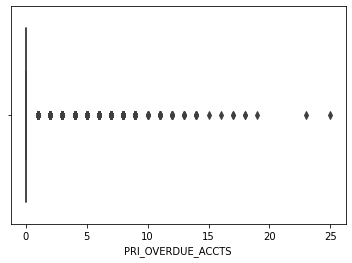

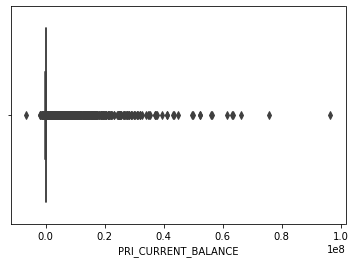

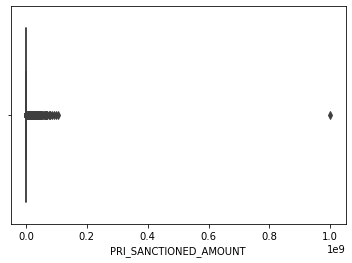

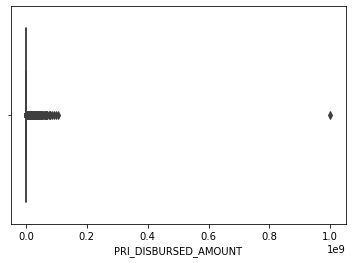

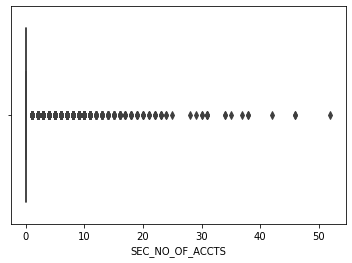

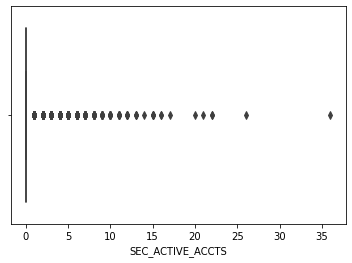

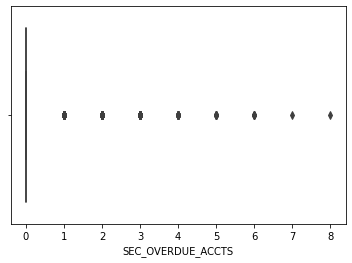

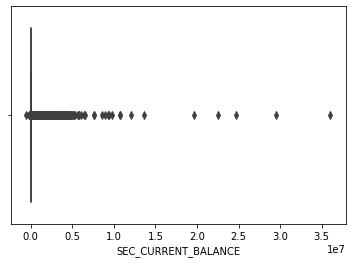

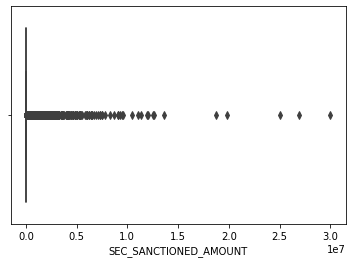

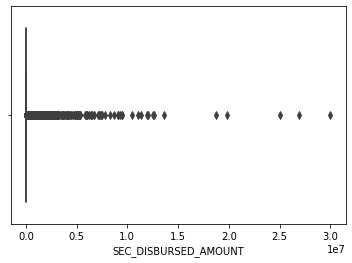

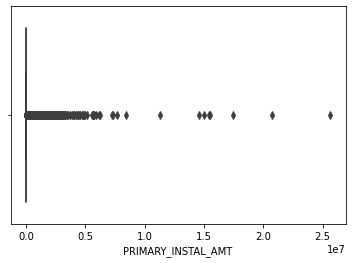

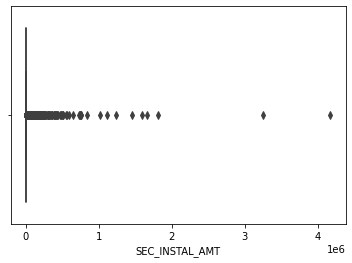

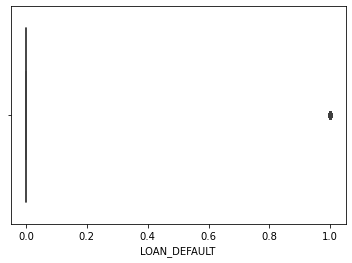

In [25]:
# Creating box plot:
for i in df_new.select_dtypes(exclude=['object','datetime64']):
    sns.boxplot(df_new[i])
    plt.show()

In [26]:
# checking skewness of the data to impute outliers:
df_new.skew()

DISBURSED_AMOUNT                         3.069300
ASSET_COST                               4.055664
LTV                                     -1.076667
MOBILENO_AVL_FLAG                        0.000000
AADHAR_FLAG                             -1.831925
PAN_FLAG                                 3.163265
VOTERID_FLAG                             1.992343
DRIVING_FLAG                             6.264506
PASSPORT_FLAG                           21.560059
PERFORM_CNS_SCORE                        0.424451
PRI_NO_OF_ACCTS                          9.857232
PRI_ACTIVE_ACCTS                         5.376997
PRI_OVERDUE_ACCTS                        7.486696
PRI_CURRENT_BALANCE                     29.256247
PRI_SANCTIONED_AMOUNT                  319.533663
PRI_DISBURSED_AMOUNT                   318.400468
SEC_NO_OF_ACCTS                         27.842352
SEC_ACTIVE_ACCTS                        30.409660
SEC_OVERDUE_ACCTS                       24.014315
SEC_CURRENT_BALANCE                    107.009186


In [27]:
df_dummy=df_new.copy()
#df_dummy.head()

def impute_outlier(x):
    if x <= lower:
        return(data_mean)
    elif x>= (upper):
        return(data_mean)
    else:
        return(x)

for col in df_new.select_dtypes(exclude=['object','datetime64']):
    data_mean, data_std = np.mean(df_new[col]), np.std(df_new[col])
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in df_new[col] if x < lower or x > upper]
    print(col)
    print('Identified outliers: %d' % len(outliers))
    print('\n')
    df_new[col]=df_new[col].apply(impute_outlier)

#checking skewness after imputing:
df_new.skew()

In [28]:
#outlier treatment

#df_new['PRI_DISBURSED_AMOUNT'].quantile(.25)# min value is zero, so no val less than zero, 
#hence no lower level treatment is required

#df_new[df_new['PRI_DISBURSED_AMOUNT']> df_new['PRI_DISBURSED_AMOUNT'].quantile(.75)]['PRI_DISBURSED_AMOUNT'].count()
#count is 56373

#df_new[df_new['SEC_CURRENT_BALANCE']< df_new['SEC_CURRENT_BALANCE'].quantile(.25)]['SEC_CURRENT_BALANCE'].count()
#df_new['SEC_INSTAL_AMT'].max()
#, 'SEC_CURRENT_BALANCE', 'SEC_INSTAL_AMT']

In [29]:
# Creating box plot after outier imputation:
#for i in df_new.select_dtypes(exclude=['object','datetime64']):
    #sns.boxplot(df_new[i])
   # plt.show()

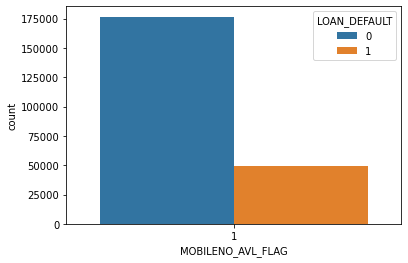

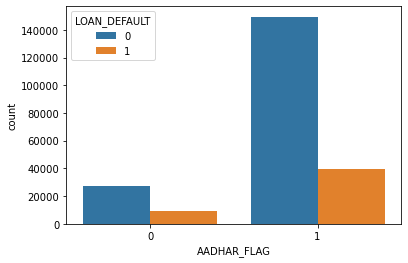

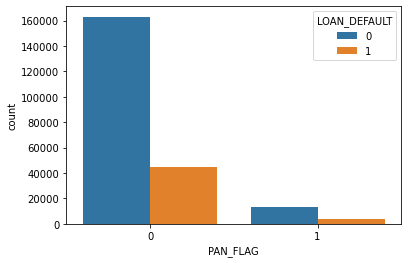

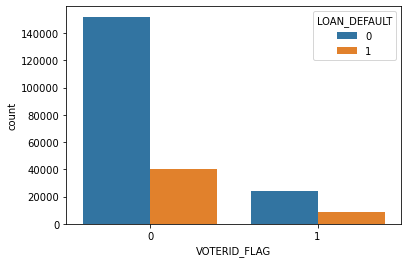

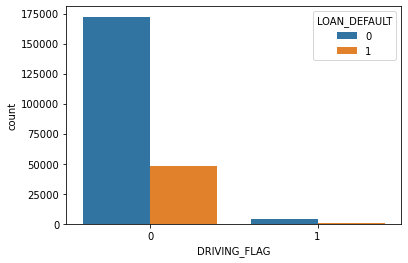

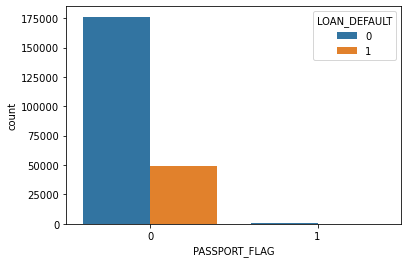

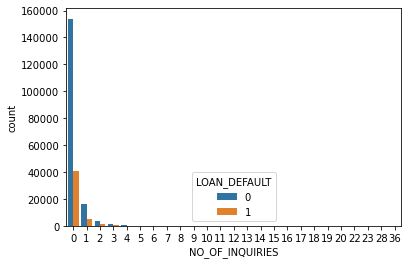

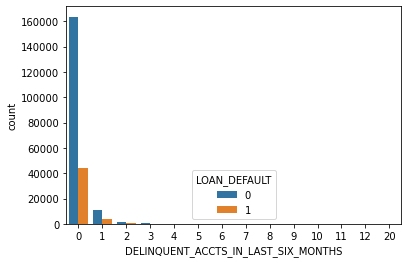

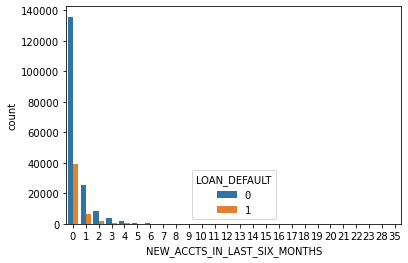

In [30]:
#plotting for categorical variable vs loan_default:
for i in cols:
    sns.countplot(df_new[i],hue=df_new['LOAN_DEFAULT'])
    plt.show()

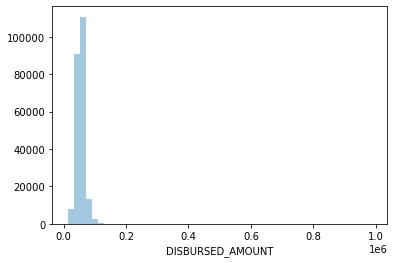

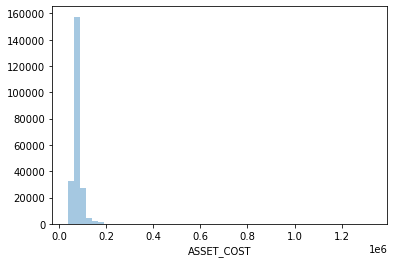

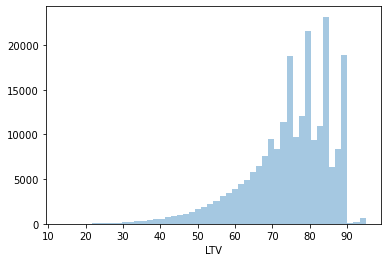

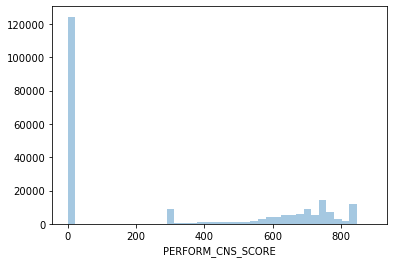

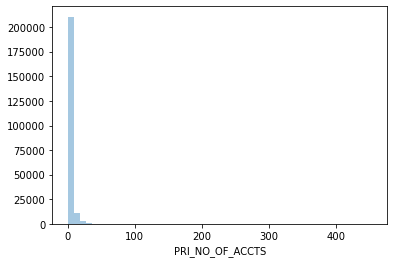

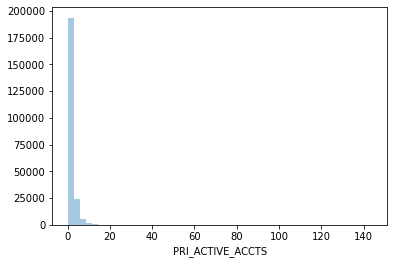

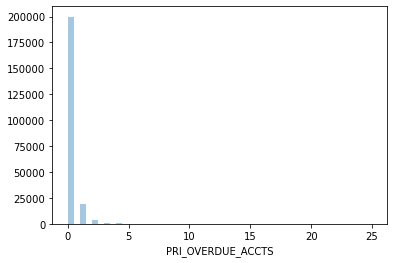

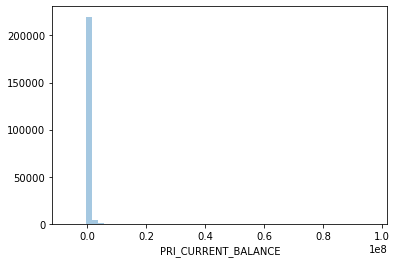

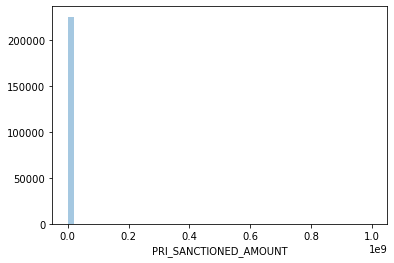

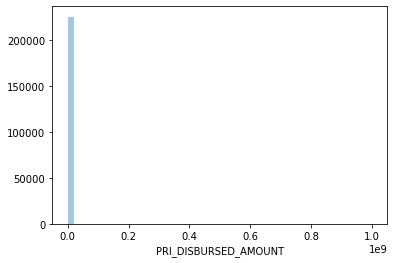

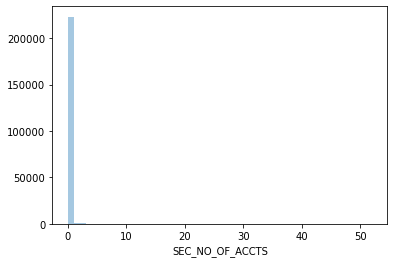

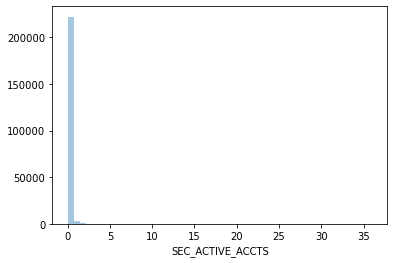

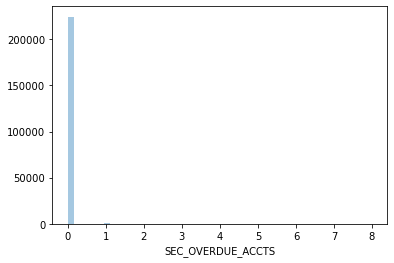

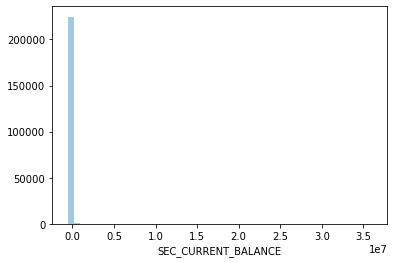

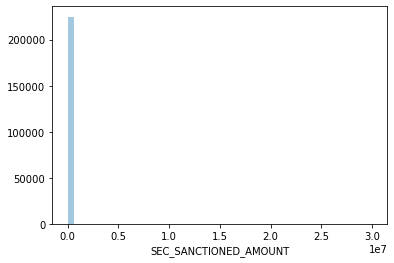

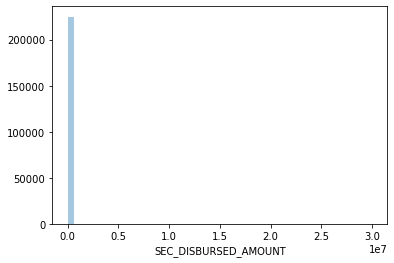

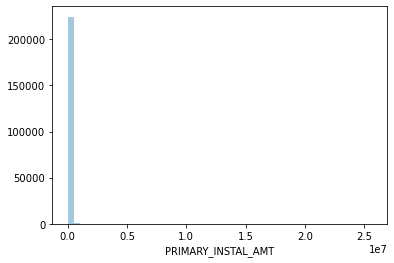

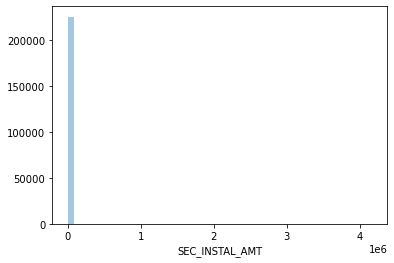

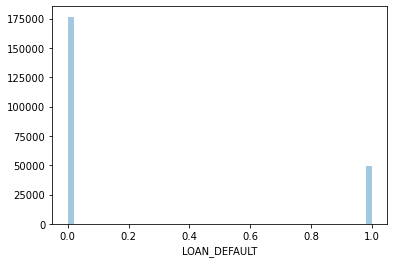

In [31]:
# plotting distribution plots for continuous variables:
for i in df_new.select_dtypes(exclude=['object','datetime64']):
    sns.distplot(df_new[i],kde=False)
    plt.show()

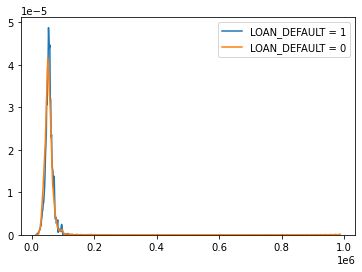

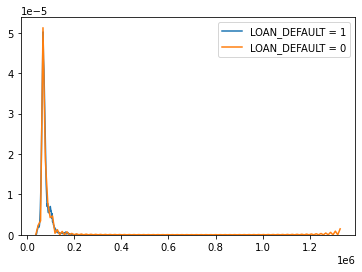

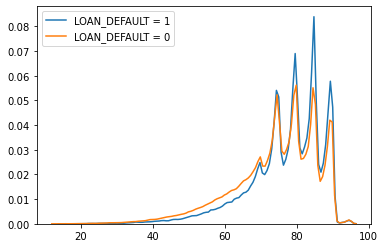

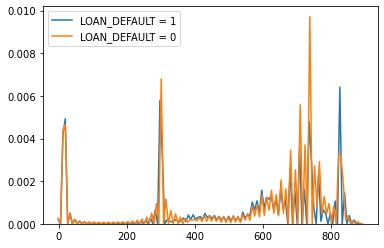

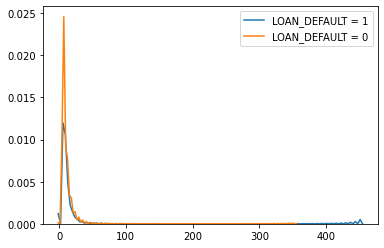

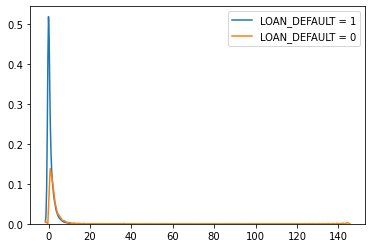

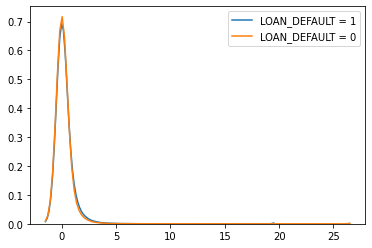

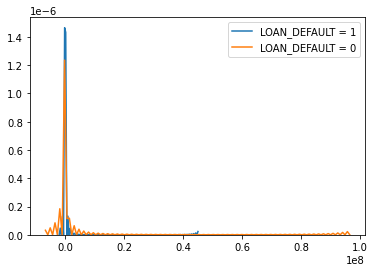

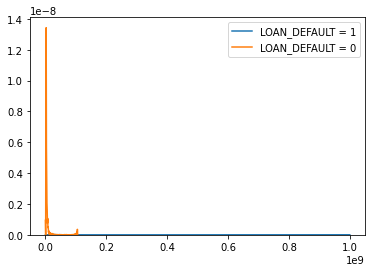

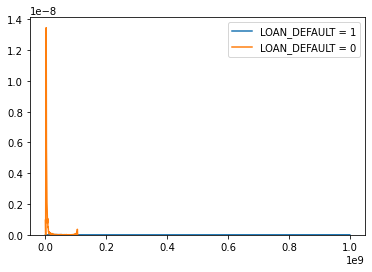

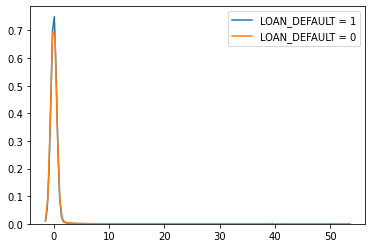

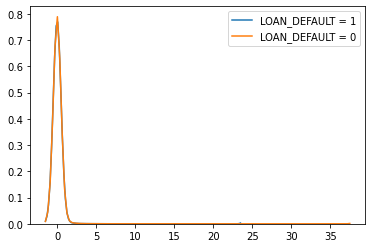

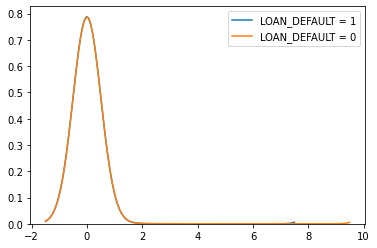

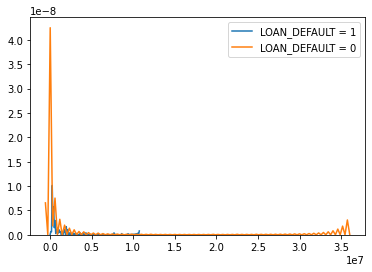

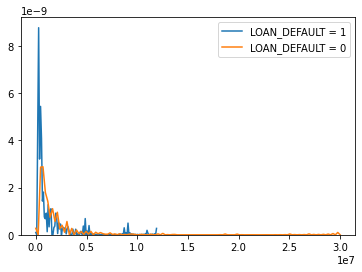

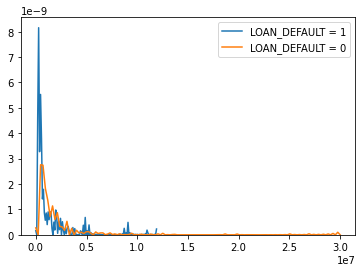

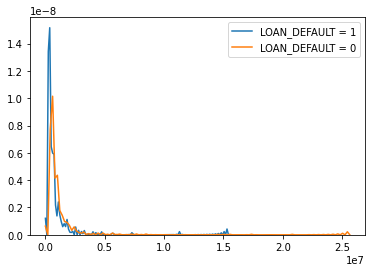

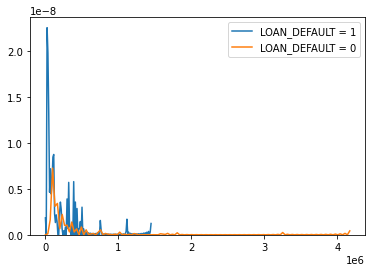

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


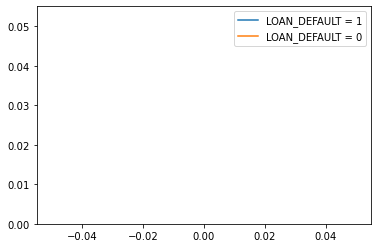

In [32]:
# plotting kde plots for continuous variables:
t1 = df_new.loc[df_new['LOAN_DEFAULT'] != 0]
t0 = df_new.loc[df_new['LOAN_DEFAULT'] == 0]
for i in df_new.select_dtypes(exclude=['object','datetime64']):
    sns.kdeplot(t1[i], bw=0.5,label="LOAN_DEFAULT = 1")
    sns.kdeplot(t0[i], bw=0.5,label="LOAN_DEFAULT = 0")
    plt.show()

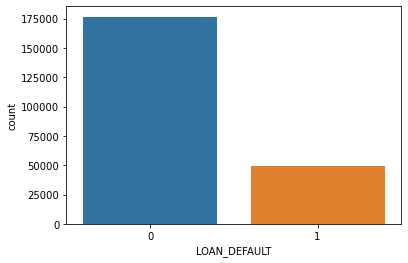

In [33]:
# target class imbalance check:
sns.countplot(df_new['LOAN_DEFAULT'])

In [34]:
df_new.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,50578,58400,89.55,1984-01-01,Salaried,2018-03-08,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,47145,65550,73.23,1985-07-31,Self employed,2018-09-26,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,53278,61360,89.63,1985-08-24,Self employed,2018-01-08,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,57513,66113,88.48,1993-12-30,Self employed,2018-10-26,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,1977-09-12,Self employed,2018-09-26,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [35]:
#converting AVERAGE_ACCT_Month column to years:
df_new[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = df_new['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
df_new[['AVERAGE_ACCT_Month','AVERAGE_ACCT_Month1']] = df_new['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
df_new["AVERAGE_ACCT_AGE"]= df_new["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((df_new["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
df_new= df_new.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month",'AVERAGE_ACCT_Month1'])

In [36]:
#converting CREDIT_HISTORY_LENGTH column to years:
df_new[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = df_new['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
df_new[['CREDIT_HISTORY_LENGTH_Month','CREDIT_HISTORY_LENGTH_Month1']] = df_new['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
df_new["CREDIT_HISTORY_LENGTH"]= df_new["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((df_new["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
df_new= df_new.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month",'CREDIT_HISTORY_LENGTH_Month1'])

In [37]:
df_new.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,50578,58400,89.55,1984-01-01,Salaried,2018-03-08,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0
1,47145,65550,73.23,1985-07-31,Self employed,2018-09-26,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.916667,1.916667,0,1
2,53278,61360,89.63,1985-08-24,Self employed,2018-01-08,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0
3,57513,66113,88.48,1993-12-30,Self employed,2018-10-26,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.666667,1.250000,1,1
4,52378,60300,88.39,1977-09-12,Self employed,2018-09-26,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,1


In [38]:
df_new.dtypes

DISBURSED_AMOUNT                                int64
ASSET_COST                                      int64
LTV                                           float64
DATE_OF_BIRTH                          datetime64[ns]
EMPLOYMENT_TYPE                                object
DISBURSAL_DATE                         datetime64[ns]
MOBILENO_AVL_FLAG                              object
AADHAR_FLAG                                    object
PAN_FLAG                                       object
VOTERID_FLAG                                   object
DRIVING_FLAG                                   object
PASSPORT_FLAG                                  object
PERFORM_CNS_SCORE                               int64
PERFORM_CNS_SCORE_DESCRIPTION                  object
PRI_NO_OF_ACCTS                                 int64
PRI_ACTIVE_ACCTS                                int64
PRI_OVERDUE_ACCTS                               int64
PRI_CURRENT_BALANCE                             int64
PRI_SANCTIONED_AMOUNT       

In [39]:
df_new['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                111773
C-Very Low Risk                                             15715
A-Very Low Risk                                             13790
D-Very Low Risk                                             11134
B-Very Low Risk                                              9032
M-Very High Risk                                             8632
F-Low Risk                                                   8309
K-High Risk                                                  8107
H-Medium Risk                                                6695
E-Low Risk                                                   5695
I-Medium Risk                                                5440
G-Low Risk                                                   3902
Not Scored: Sufficient History Not Available                 3671
J-High Risk                                                  3667
Not Scored: Not Enough Info available on the customer        3557
Not Scored

In [40]:
g = df_new.groupby("PERFORM_CNS_SCORE_DESCRIPTION")['LOAN_DEFAULT']
gg = pd.concat([g.value_counts(), 
                g.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))
print (gg)

                                                                 counts  \
PERFORM_CNS_SCORE_DESCRIPTION                      LOAN_DEFAULT           
A-Very Low Risk                                    0              11518   
                                                   1               2272   
B-Very Low Risk                                    0               7854   
                                                   1               1178   
C-Very Low Risk                                    0              13009   
                                                   1               2706   
D-Very Low Risk                                    0               9478   
                                                   1               1656   
E-Low Risk                                         0               4717   
                                                   1                978   
F-Low Risk                                         0               6767   
                         

In [41]:
#converting age into number of days
now = pd.Timestamp('now')
df_new['age'] = (now - df_new['DATE_OF_BIRTH'])  

df_new['age']= df_new['age'].astype(str)
df_new[['age','age_waste']] = df_new['age'].str.split("days",expand=True)
df_new['age']= df_new['age'].astype(str).astype(int)
df_new= df_new.drop(columns= ['age_waste'])

print(df_new['age'].head())

0    13606
1    13029
2    13005
3     9955
4    15908
Name: age, dtype: int32


In [42]:
df_new['Disbursal_days'] = (now - df_new['DISBURSAL_DATE'])  

df_new['Disbursal_days']= df_new['Disbursal_days'].astype(str)
df_new[['Disbursal_days','Disbursal_waste']] = df_new['Disbursal_days'].str.split("days",expand=True)
df_new['Disbursal_days']= df_new['Disbursal_days'].astype(str).astype(int)
df_new= df_new.drop(columns= ['Disbursal_waste'])

print(df_new['Disbursal_days'].head())

0    1121
1     919
2    1180
3     889
4     919
Name: Disbursal_days, dtype: int32


In [43]:
#dropping Date of birth and Disbursal date since we have already converted into age and no. of days respectively

df_new= df_new.drop(['DATE_OF_BIRTH', 'DISBURSAL_DATE'], axis=1)
df_new.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,age,Disbursal_days
0,50578,58400,89.55,Salaried,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,13606,1121
1,47145,65550,73.23,Self employed,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1.916667,1.916667,0,1,13029,919
2,53278,61360,89.63,Self employed,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,13005,1180
3,57513,66113,88.48,Self employed,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0.666667,1.250000,1,1,9955,889
4,52378,60300,88.39,Self employed,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,1,1,15908,919


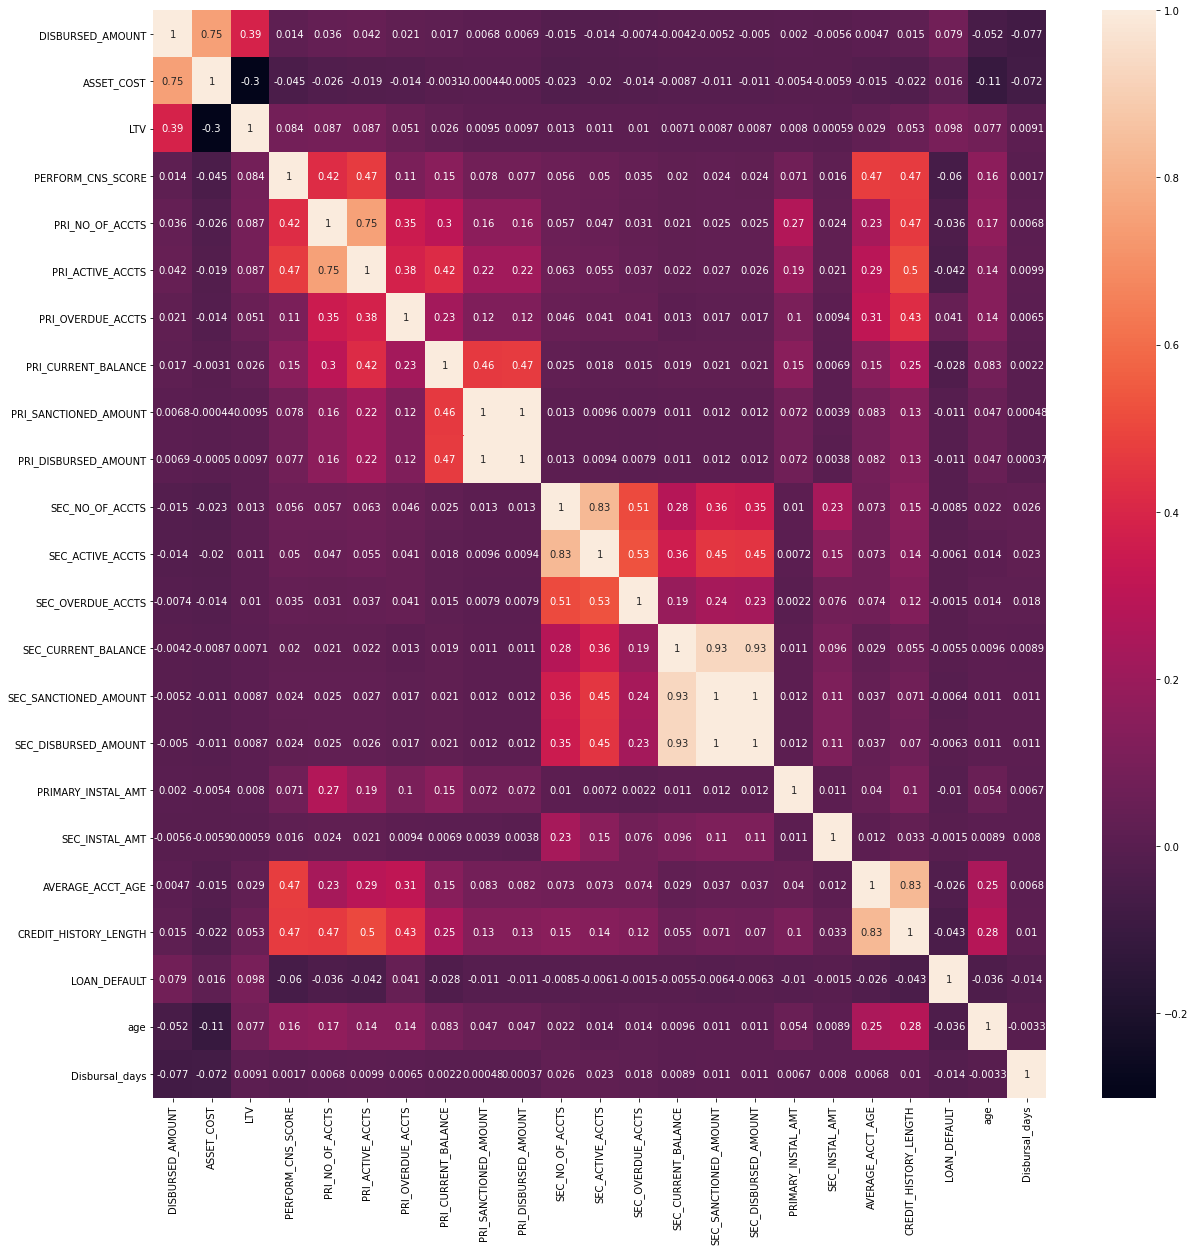

In [44]:
#we will plot the heatmap to check corelation 

fig,ax=plt.subplots(figsize=(20,20))

tiltle= 'Heat Map to check Corelation'

sns.heatmap(df_new.corr(), annot=True, ax=ax)
plt.show()

In [45]:
#Inference: These columns are multicolinear with each other, so we will drop one out of each group

#1.PRI_CURRENT_BALANCE, PRI_SANCTIONED_AMOUNT and PRI_DISBURSED_AMOUNT, 
#2.SEC_SANCTIONED_AMOUNT, SEC_CURRENT_BALANCE and SEC_DISBURSED_AMOUNT, 
#3.AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH 
#4.PRI_NO_OF_ACCTS and  PRI_ACTIVE_ACCTS

In [46]:
#df_new['Sanc_minus_dis']= df_new['PRI_SANCTIONED_AMOUNT']- df_new['PRI_DISBURSED_AMOUNT']

In [47]:
#df_new['Sanc_minus_dis'].unique()

In [48]:
#df_new[df_new['LOAN_DEFAULT']==0]['Sanc_minus_dis'].value_counts(), df_new[df_new['LOAN_DEFAULT']==1]['Sanc_minus_dis'].value_counts()



In [49]:
#df_new= df_new.drop('Sanc_minus_dis', axis=1)

In [50]:
df_new['LOAN_DEFAULT'].value_counts()

0    176526
1     48967
Name: LOAN_DEFAULT, dtype: int64

In [51]:
#We will drop PRI_SANCTIONED_AMOUNT, SEC_SANCTIONED_AMOUNT, AVERAGE_ACCT_AGE and PRI_NO_OF_ACCTS

df_treated= df_new.drop(['PRI_SANCTIONED_AMOUNT', 'SEC_SANCTIONED_AMOUNT','AVERAGE_ACCT_AGE','PRI_NO_OF_ACCTS'], axis=1)


In [52]:
df_treated.dtypes

DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
EMPLOYMENT_TYPE                         object
MOBILENO_AVL_FLAG                       object
AADHAR_FLAG                             object
PAN_FLAG                                object
VOTERID_FLAG                            object
DRIVING_FLAG                            object
PASSPORT_FLAG                           object
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_ACTIVE_ACCTS                         int64
PRI_OVERDUE_ACCTS                        int64
PRI_CURRENT_BALANCE                      int64
PRI_DISBURSED_AMOUNT                     int64
SEC_NO_OF_ACCTS                          int64
SEC_ACTIVE_ACCTS                         int64
SEC_OVERDUE_ACCTS                        int64
SEC_CURRENT_BALANCE                      int64
SEC_DISBURSED_AMOUNT                     int64
PRIMARY_INSTA

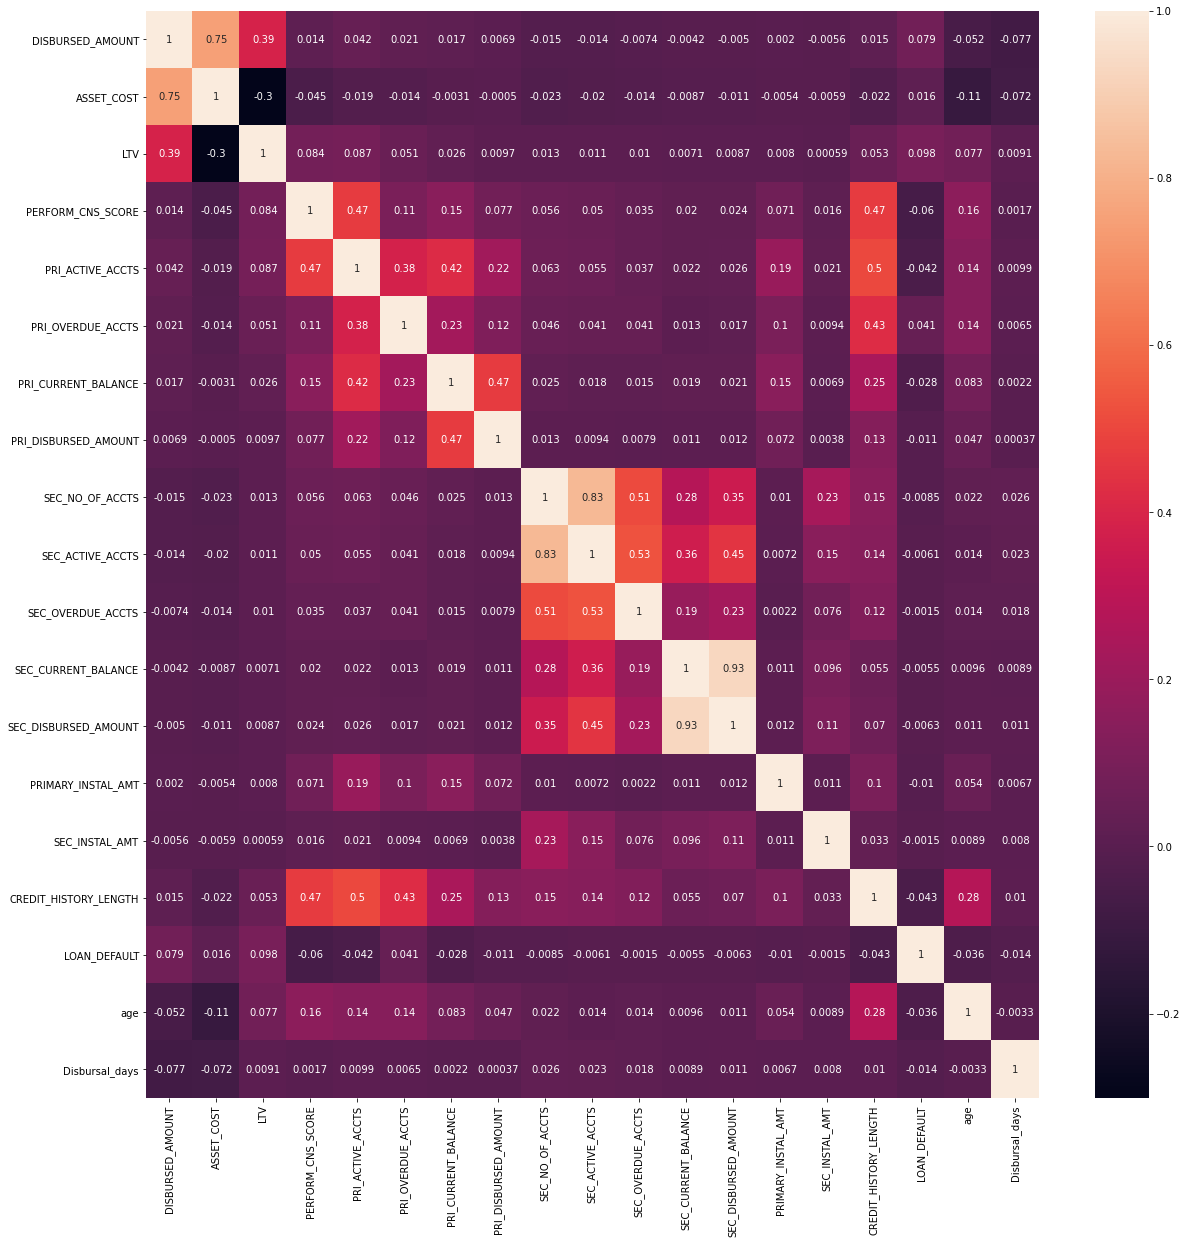

In [53]:
#checking the multicolinearity after droping the most multi-colinear columns
fig,ax=plt.subplots(figsize=(20,20))

tiltle= 'Heat Map to check Corelation'

sns.heatmap(df_treated.corr(), annot=True, ax=ax)
plt.show()

In [54]:
#Inference: Again these columns are still multicolinear with each other, so we will drop one out of each group

#1.PRI_CURRENT_BALANCE and PRI_DISBURSED_AMOUNT
#2.SEC_CURRENT_BALANCE and SEC_DISBURSED_AMOUNT


In [55]:
##We will drop PRI_CURRENT_BALANCE, SEC_DISBURSED_AMOUNT (check at later stage)

#df_treated_new= df_treated.drop(['PRI_CURRENT_BALANCE', 'SEC_DISBURSED_AMOUNT'], axis=1)


In [56]:
#we will drop Mobile Avl Flag, as the standard deviation is zero and it will not add any value to the model building

df_treated=df_treated.drop('MOBILENO_AVL_FLAG', axis=1)

In [57]:
df_treated.dtypes

DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
EMPLOYMENT_TYPE                         object
AADHAR_FLAG                             object
PAN_FLAG                                object
VOTERID_FLAG                            object
DRIVING_FLAG                            object
PASSPORT_FLAG                           object
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_ACTIVE_ACCTS                         int64
PRI_OVERDUE_ACCTS                        int64
PRI_CURRENT_BALANCE                      int64
PRI_DISBURSED_AMOUNT                     int64
SEC_NO_OF_ACCTS                          int64
SEC_ACTIVE_ACCTS                         int64
SEC_OVERDUE_ACCTS                        int64
SEC_CURRENT_BALANCE                      int64
SEC_DISBURSED_AMOUNT                     int64
PRIMARY_INSTAL_AMT                       int64
SEC_INSTAL_AM

In [58]:
#df_treated['NEW_ACCTS_IN_LAST_SIX_MONTHS']= df_treated['NEW_ACCTS_IN_LAST_SIX_MONTHS'].astype('object' )
#in final stage add into the object list cols

In [59]:

df_treated_new_num= df_treated.select_dtypes(exclude='object')
df_treated_new_cat= df_treated.select_dtypes(include='object')



In [60]:
df_treated_new_num.shape, df_treated_new_cat.shape, df_treated_new_cat.shape

((225493, 19), (225493, 10), (225493, 10))

In [61]:
df_treated_new_num.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'CREDIT_HISTORY_LENGTH',
       'LOAN_DEFAULT', 'age', 'Disbursal_days'],
      dtype='object')

In [62]:
#encoding categorical columns by label encoder 

from sklearn.preprocessing import LabelEncoder

In [63]:
LE= LabelEncoder()

In [64]:
for i in df_treated_new_cat.columns:
    df_treated_new_cat[i]=LE.fit_transform(df_treated_new_cat[i])


<ipython-input-64-dc675031fc77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treated_new_cat[i]=LE.fit_transform(df_treated_new_cat[i])


In [65]:
df_treated_new_cat.head()



,EMPLOYMENT_TYPE,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE_DESCRIPTION,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES
0,0,1,0,0,0,0,13,0,0,0
1,1,1,0,0,0,0,8,0,1,0
2,1,1,0,0,0,0,13,0,0,0
3,1,1,0,0,0,0,11,0,0,1
4,1,1,0,0,0,0,13,0,0,1


In [66]:
#now we will scale numerical columns

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [67]:
df_num_scaled= sc.fit_transform(df_treated_new_num.drop('LOAN_DEFAULT', axis=1))
df_num_scaled = pd.DataFrame(df_num_scaled, columns = df_treated_new_num.drop('LOAN_DEFAULT', axis=1).columns)
df_num_scaled.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,PERFORM_CNS_SCORE,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,CREDIT_HISTORY_LENGTH,age,Disbursal_days
0,-0.286698,-0.930028,1.288546,-0.864747,-0.539837,-0.287288,-0.177038,-0.091776,-0.094963,-0.08846,-0.065553,-0.032208,-0.039743,-0.086785,-0.02067,-0.573742,-0.010802,3.311118
1,-0.555414,-0.544116,-0.137795,0.899920,-0.027544,1.519677,-0.148036,-0.070986,-0.094963,-0.08846,-0.065553,-0.032208,-0.039743,-0.073486,-0.02067,0.228300,-0.173658,-0.220031
2,-0.075357,-0.770266,1.295538,-0.864747,-0.539837,-0.287288,-0.177038,-0.091776,-0.094963,-0.08846,-0.065553,-0.032208,-0.039743,-0.086785,-0.02067,-0.573742,-0.180432,4.342493
3,0.256135,-0.513729,1.195029,0.035292,-0.539837,-0.287288,-0.177038,-0.091776,-0.094963,-0.08846,-0.065553,-0.032208,-0.039743,-0.086578,-0.02067,-0.050671,-1.041278,-0.744460
4,-0.145804,-0.827478,1.187164,-0.864747,-0.539837,-0.287288,-0.177038,-0.091776,-0.094963,-0.08846,-0.065553,-0.032208,-0.039743,-0.086785,-0.02067,-0.573742,0.638925,-0.220031


In [68]:
#we will concat both cat and num columns

df_final= pd.concat([df_num_scaled, df_treated_new_cat], axis=1)
df_final.shape

(225493, 28)

In [69]:
df_target= df_treated_new_num['LOAN_DEFAULT']
df_target.head()

0    0
1    1
2    0
3    1
4    1
Name: LOAN_DEFAULT, dtype: int64

In [70]:
#####
####
#stastical tests

import scipy.stats as st
df_final_target= pd.concat([df_final, df_target], axis=1)
st.chi2_contingency(pd.crosstab(df_final_target['LOAN_DEFAULT'],df_final_target['EMPLOYMENT_TYPE']))

cat_list= ['EMPLOYMENT_TYPE', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
       'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE_DESCRIPTION']
pval_chi2= []
for x in cat_list:
    a,b, c, d= st.chi2_contingency(pd.crosstab(df_final_target['LOAN_DEFAULT'],df_final_target[x]))
    pval_chi2.append(b)
    
pval_chi2
#based on the chi square test and comparinf the pvaues with significance as 5%, we found that PAN_FLAG is not
#significant, hecne droping from the final dataset

#pan_flag

num_list= ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_DISBURSED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'age', 'Disbursal_days']
pval_leve= []
for x in num_list:
    e, f= st.levene(df_final_target[x], df_final_target['LOAN_DEFAULT'])
    pval_leve.append(f)
    
pval_leve
#all the attributes has passed the levene test hecne going with annova

df_ld1= df_final_target[df_final_target['LOAN_DEFAULT']==1]
df_ld0= df_final_target[df_final_target['LOAN_DEFAULT']==0]

st.f_oneway(df_ld1, df_ld0)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif= pd.DataFrame()

vif['vif_cols']= df_final.columns
vif['Vif']= [variance_inflation_factor(df_final.values, i) for i in range (df_final.shape[1])]
vif

,vif_cols,Vif
0,DISBURSED_AMOUNT,30.313909
1,ASSET_COST,28.334372
2,LTV,14.772924
3,PERFORM_CNS_SCORE,10.194731
4,PRI_ACTIVE_ACCTS,3.589208
5,PRI_OVERDUE_ACCTS,1.624519
6,PRI_CURRENT_BALANCE,1.525905
7,PRI_DISBURSED_AMOUNT,1.282933
8,SEC_NO_OF_ACCTS,3.437687
9,SEC_ACTIVE_ACCTS,3.755641


In [73]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=28) #210 x7
#pca.fit(df_final)
#var_exp_bypca=pca.explained_variance_ratio_ *100
#plt.figure(figsize=(10, 10))
#plt.bar(range(1, 29),var_exp_bypca)
#plt.step(range(1, 29),np.cumsum(var_exp_bypca))
#np.cumsum(var_exp_bypca)
#len(np.cumsum(var_exp_bypca))
#preduce= pca.components_[:, :14]
#preduce.shape

#df_pca=pd.DataFrame(np.dot(df_final, preduce))


#spliting the dataset into train and test dataset

#Xtrain, Xtest, ytrain, ytest= train_test_split(df_pca,df_target, test_size=0.3 , random_state= 7)
#Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
#spliting the dataset into train and test dataset

Xtrain, Xtest, ytrain, ytest= train_test_split(df_final,df_target, test_size=0.3 , random_state= 7)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((157845, 28), (67648, 28), (157845,), (67648,))

In [76]:

XXtrain, XXtest, yytrain, yytest= train_test_split(Xtrain, ytrain, test_size=0.4 , random_state= 7)
XXtrain.shape, XXtest.shape, yytrain.shape, yytest.shape

((94707, 28), (63138, 28), (94707,), (63138,))

In [77]:
weer

NameError: name 'weer' is not defined

In [ ]:
df_final.skew()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score

In [ ]:
#apply base model

#LR= LogisticRegression()

In [ ]:
#model1= LR.fit(Xtrain,ytrain)


In [ ]:
#ypred1= model1.predict(Xtest)
#print(ypred1)

In [ ]:
#accuracy_score(ytest, ypred1)

In [ ]:
#f1_score(ytest, ypred1)

In [ ]:
#addboosy

In [ ]:
#accuracy_score(ytest,ypred1)

In [ ]:
#confusion_matrix(ytest,ypred1)

In [ ]:
#print(classification_report(ytest,ypred1))

In [ ]:
#f1_score(ytest,ypred1)

In [ ]:
#Decision Tree Model

DT= DecisionTreeClassifier()

In [ ]:
#model2= DT.fit(Xtrain,ytrain)
#model2

In [ ]:
#ypred2= model2.predict(Xtest)
#print(ypred2)

In [ ]:
#print(accuracy_score(ytest,ypred2))

In [ ]:
#print(classification_report(ytest,ypred2))

In [ ]:
#f1_score(ytest,ypred2)

In [ ]:
DT_tuned =DecisionTreeClassifier()

In [ ]:
cv= KFold(n_splits=3, shuffle=True, random_state=7)

In [ ]:
#Hyperparameter tuning

#param_grid= {'criterion':['gini','entropy'], 'max_features':['auto', 'sqrt'], 
   #          'max_depth': np.arange(5, 30, 6), 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf':
  #          [1,2,5, 10]}

In [ ]:
#tree_grid= GridSearchCV(estimator=DT_tuned,param_grid=param_grid, cv=cv, scoring= 'roc_auc', n_jobs=-1)

In [ ]:
#tree_grid.fit(df_final,df_target)

In [ ]:
#tree_grid.best_params_

In [ ]:
#DT_tuned_new= DecisionTreeClassifier(criterion= 'entropy',
       #                             max_depth= 11,
     #                               max_features= 'auto',
      #                              min_samples_leaf= 1,
      #                              min_samples_split= 2)

In [ ]:
#model3= DT_tuned_new.fit(Xtrain,ytrain)

In [ ]:
#ypred3= model3.predict(Xtest)

In [ ]:
#accuracy_score(ytest,ypred3)

In [ ]:
#print(classification_report(ytest,ypred3))

In [ ]:
#f1_score(ytest,ypred3)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(Xtrain, ytrain)

In [ ]:
#selection.feature_importances_

In [ ]:
#apply Random Forest

RF= RandomForestClassifier()

In [ ]:
#model4= RF.fit(Xtrain,ytrain)


In [ ]:
#ypred4= model4.predict(Xtest)

In [ ]:
#accuracy_score(ytest,ypred4)

In [ ]:
#print(classification_report(ytest,ypred4))

In [ ]:
#f1_score(ytest,ypred4)

In [ ]:
#cross_val_score()

In [ ]:
#tree_grid_rf= GridSearchCV(estimator=RF_tuned,param_grid=param_grid_rf, scoring= 'roc_auc', n_jobs=-1)

In [ ]:
#tree_grid_rf.fit(df_final,df_target)

In [ ]:
#tree_grid_rf.best_params_

In [ ]:
#random_tuned_1= RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=5)
#random_tuned_2= RandomForestClassifier(criterion='gini', max_depth=5, min_samples_leaf=1, min_samples_split=5)

In [ ]:
#n_esti= [50, 100, 150, 200, 300]
#rf_score= []
#for i in n_esti:
 #   print(i)
#    scores= cross_val_score(estimator=random_tuned_2,X=df_final, y=df_target,scoring='roc_auc', n_jobs=-1)
 #   rf_score.append(scores)

In [ ]:
#rf_score

In [ ]:
###using KNN

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#knn= KNeighborsClassifier()

In [ ]:
#model_knn_initial= knn.fit(Xtrain, ytrain)

In [ ]:
#accuracy_score(ytrain, model_knn_initial.predict(Xtest))

In [ ]:
#f1_score(ytrain, model_knn_initial.predict(Xtest))

In [ ]:
#parameter tuning
#knn= KNeighborsClassifier()
#param_knn_initial= {'n_neighbors': np.arange(1, 100), 'weights': ['uniform', 'distance']}
#GS= GridSearchCV(knn, param_knn_initial, cv=5, scoring='roc_auc', n_jobs=-1)
#GS.fit(df_final, df_target)

In [ ]:
#random_tuned_1.fit(Xtrain, ytest)

In [ ]:
#random_tuned_1.score(Xtest, ytest)

In [ ]:
#f1_score(ytest, random_tuned_1.predict(Xtest))

In [ ]:
#rf_final= RandomForestRegressor(n_estimators= 1144,
   #                         min_samples_split= 2,
    #                        min_samples_leaf =2,
   #                         max_features= 'auto',
       #                     max_depth= 23)


In [ ]:
from sklearn.model_selection import train_test_split

#spliting the dataset into train and test dataset

Xtrain_norm, Xtest_norm, ytrain_norm, ytest_norm= train_test_split(df_final,df_target, test_size=0.3 , random_state= 7)
Xtrain_norm.shape, Xtest_norm.shape, ytrain_norm.shape, ytest_norm.shape

In [ ]:
#apply LR model without SMOTE

LR= LogisticRegression()
model1= LR.fit(Xtrain_norm,ytrain_norm)
ypred1= model1.predict(Xtest_norm)
#print(ypred1)

In [ ]:
print('accuracy_score',accuracy_score(ytest_norm, ypred1)), print('\n'),print('f1_score', f1_score(ytest_norm, ypred1)), print('\n'), print('classification_report',classification_report(ytest_norm, ypred1))


## we see thet the accurancy is ~77% which is good but f1_score is very very low which need improvement

In [ ]:
#Decision Tree base model without SMOTE

DT= DecisionTreeClassifier()
model2= DT.fit(Xtrain_norm,ytrain_norm)
ypred2= model2.predict(Xtest_norm)

In [ ]:
print('accuracy_score',accuracy_score(ytest_norm, ypred2)), print('\n'),print('f1_score', f1_score(ytest_norm, ypred2)), print('\n'), print('classification_report',classification_report(ytest_norm, ypred2))


## we see thet the accurancy is ~66% decreased from Logeitic regressor model 
#but f1_score is far better than Logistic regression

In [ ]:
#apply Random Forest without SMOTE

RF= RandomForestClassifier()
model4= RF.fit(Xtrain_norm,ytrain_norm)
ypred4= model4.predict(Xtest_norm)
#accuracy_score(ytest_norm,ypred4)

In [ ]:
print('accuracy_score',accuracy_score(ytest_norm, ypred4)), print('\n'),print('f1_score', f1_score(ytest_norm, ypred4)), print('\n'), print('classification_report',classification_report(ytest_norm, ypred4))


## we see thet the accurancy is ~77%, better tahn DT but similar to Logistic regressor model 
#but f1_score is lesser than DT

In [83]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(df_final,df_target, test_size=0.25, random_state=2)

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

Xtrain, Xtest, ytrain, ytest= train_test_split(X_train,y_train, test_size=0.3 , random_state= 2)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape
XXtrain, XXtest, yytrain, yytest= train_test_split(Xtrain,ytrain, test_size=0.3 , random_state= 2)
XXtrain.shape, XXtest.shape, yytrain.shape, yytest.shape
XXXtrain, XXXtest, yyytrain, yyytest= train_test_split(XXtrain,yytrain, test_size=0.3 , random_state= 2)
XXXtrain.shape, XXXtest.shape, yyytrain.shape, yyytest.shape

In [84]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(df_final, df_target)



In [85]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X_train,y_train, test_size=0.5 , random_state= 2)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape
XXtrain, XXtest, yytrain, yytest= train_test_split(Xtrain,ytrain, test_size=0.5 , random_state= 2)
XXtrain.shape, XXtest.shape, yytrain.shape, yytest.shape
XXXtrain, XXXtest, yyytrain, yyytest= train_test_split(XXtrain,yytrain, test_size=0.5 , random_state= 2)
XXXtrain.shape, XXXtest.shape, yyytrain.shape, yyytest.shape

((44131, 28), (44132, 28), (44131,), (44132,))

In [ ]:
#LR with SMOTE

lr= LogisticRegression()
model_lr_smote= lr.fit(Xtrain, ytrain)

ypred_lr_smote= model_lr_smote.predict(Xtest)

print('accuracy_score',accuracy_score(ytest, ypred_lr_smote)), print('\n'),print('f1_score', f1_score(ytest, ypred_lr_smote)), print('\n'), print('classification_report',classification_report(ytest, ypred_lr_smote))


In [ ]:
dt_smote= DecisionTreeClassifier()

In [ ]:
#DT with SMOTE without tuning

model2_smote= dt_smote.fit(Xtrain, ytrain)
ypred2_smote= model2_smote.predict(Xtest)
#print(ypred2)

In [ ]:
print('accuracy_score',accuracy_score(ytest, ypred2_smote)), print('\n'),print('f1_score', f1_score(ytest, ypred2_smote)), print('\n'), print('classification_report',classification_report(ytest, ypred2_smote))


In [79]:

rf_smote= RandomForestClassifier()

In [91]:
#RF with SMOTE (without Tuning)

rf_smote= RandomForestClassifier()
model_rf_smote= rf_smote.fit(Xtrain, ytrain)
ypred_rf_smote= model_rf_smote.predict(Xtest)

In [92]:
print('accuracy_score',accuracy_score(ytest, ypred_rf_smote)), print('\n'),print('f1_score', f1_score(ytest, ypred_rf_smote)), print('\n'), print('classification_report',classification_report(ytest, ypred_rf_smote))


accuracy_score 0.7869322366110375


f1_score 0.7862079941794371


classification_report               precision    recall  f1-score   support

           0       0.78      0.79      0.79     88137
           1       0.79      0.78      0.79     88389

    accuracy                           0.79    176526
   macro avg       0.79      0.79      0.79    176526
weighted avg       0.79      0.79      0.79    176526



(None, None, None, None, None)

In [93]:
#Important Features

model_rf_smote.feature_importances_

array([0.13439563, 0.12700909, 0.13881716, 0.03858105, 0.03604177,
       0.00740816, 0.03303146, 0.03381803, 0.00236944, 0.00105442,
       0.00050856, 0.00137912, 0.00153043, 0.04416189, 0.00118995,
       0.04233515, 0.13255905, 0.13927374, 0.01393307, 0.00673827,
       0.0077218 , 0.00590148, 0.00304236, 0.00039739, 0.01963737,
       0.00888167, 0.00450234, 0.01378014])

In [94]:
Xtrain.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_DISBURSED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'CREDIT_HISTORY_LENGTH', 'age',
       'Disbursal_days', 'EMPLOYMENT_TYPE', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES'],
      dtype='object')

In [ ]:
#DT Tuned with SMOTE

dt_smote_tuned= DecisionTreeClassifier()
param_grid= {'criterion':['gini','entropy'], 'max_features':['auto', 'sqrt'], 
             'max_depth': np.arange(5, 30, 6), 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf':
            [1,2,5, 10]}

tree_grid= GridSearchCV(estimator=dt_smote_tuned,param_grid=param_grid, cv=3, scoring= 'roc_auc', n_jobs=-1)
tree_grid.fit(X_train, y_train)

In [ ]:
tree_grid.best_params_

In [ ]:
dt_smote_tuned_final= DecisionTreeClassifier(criterion= 'gini', max_depth= 29,  max_features= 'sqrt',  min_samples_leaf= 2,
                       min_samples_split= 15)
model_dt_smote_tuned_final=dt_smote_tuned_final.fit(Xtrain, ytrain)

ypred_dt_final= model_dt_smote_tuned_final.predict(Xtest)

In [ ]:
print('accuracy_score',accuracy_score(ytest, ypred_dt_final)), print('\n'),print('f1_score', f1_score(ytest, ypred_dt_final)), print('\n'), print('classification_report',classification_report(ytest, ypred_dt_final))


In [ ]:
##### RF Tuned with SMOTE

RF_tuned_smote= RandomForestClassifier( n_jobs=-1)
param_grid_rf_smote= {'criterion':['gini','entropy'], 'max_depth': np.arange(1, 20, 2), 'min_samples_split': np.arange(1, 20, 2), 'min_samples_leaf':
            [1,2,5, 10], 'n_estimators': [10, 20, 50]}

tree_grid_rf= GridSearchCV(estimator=RF_tuned_smote,param_grid=param_grid_rf_smote, scoring= 'roc_auc', n_jobs=-1)

In [ ]:
tree_grid_rf.fit(XXXtrain, yyytrain)

In [ ]:
tree_grid_rf.best_params_

In [80]:
rf_tuned_final= RandomForestClassifier(criterion= 'entropy',max_depth= 19,min_samples_leaf= 2,min_samples_split= 5,
                                      n_estimators= 50)

In [86]:
model_rf_smote_tuned_final=rf_tuned_final.fit(XXXtrain, yyytrain)

In [87]:
ypred_rf_final= model_rf_smote_tuned_final.predict(XXXtest)

In [88]:
print('F1 Score for RF model:',f1_score(yyytest, ypred_rf_final))

F1 Score for RF model: 0.6878961666163598


In [89]:
print('Accuracy for RF Model:',accuracy_score(yyytest, ypred_rf_final))

Accuracy for RF Model: 0.6719840478564307


In [90]:
print(classification_report(yyytest, ypred_rf_final))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65     22045
           1       0.66      0.72      0.69     22087

    accuracy                           0.67     44132
   macro avg       0.67      0.67      0.67     44132
weighted avg       0.67      0.67      0.67     44132

